# Semana 7: Pandas

Pandas es una librería poderosa y flexible para la manipulación y el análisis de datos en Python. 
Proporciona estructuras de datos rápidas, flexibles y expresivas diseñadas para facilitar el trabajo con datos estructurados (tablas) y de series temporales.

Algunas de las principales funcionalidades de pandas incluyen:
- Carga de datos desde múltiples fuentes (CSV, Excel, bases de datos, etc.)
- Limpieza y preparación de datos
- Transformaciones complejas de datos
- Análisis estadísticos y operaciones matemáticas
- Visualización de datos

In [100]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones para gráficos
sns.set(style="whitegrid")

## Carga de datos

Para este ejercicio, usaremos un dataset de precios de casas. Este dataset incluye diversas características de las casas y sus precios de venta.
El dataset está disponible en Kaggle: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

### Descripción del dataset:

Este dataset contiene las siguientes columnas principales (entre otras):
- **Id**: Identificador único de la casa.
- **MSSubClass**: La clase de construcción de la casa.
- **MSZoning**: La clasificación de la zona.
- **LotFrontage**: La longitud de la fachada del lote en pies lineales.
- **LotArea**: El tamaño del lote en pies cuadrados.
- **Street**: Tipo de calle de acceso a la propiedad.
- **SalePrice**: El precio de venta de la propiedad en dólares.

El objetivo de este dataset es predecir el precio de venta de las casas en función de las características proporcionadas.



In [101]:
# Cargar el dataset
data = pd.read_csv('house_prices.csv')

# Mostrar las primeras filas del dataset
data.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

## Exploración de Datos

Explorar los datos nos ayuda a entender la estructura general del dataset, detectar problemas y obtener un resumen estadístico inicial.


### Información general del dataset

La función `info()` nos proporciona un resumen del DataFrame, incluyendo el número de filas, columnas, y el tipo de datos de cada columna.
Esto es útil para entender la estructura general de nuestros datos y detectar problemas como valores nulos.


In [102]:
print("Información del dataset:")
print(data.info())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nul

### Descripción estadística de los datos

La función `describe()` nos da un resumen estadístico de las columnas numéricas del DataFrame, 
incluyendo métricas como la media, la desviación estándar, los valores mínimos y máximos, y los percentiles.
Esto es útil para entender la distribución y las propiedades estadísticas de nuestros datos.


In [103]:
print("\nDescripción estadística:")
print(data.describe())



Descripción estadística:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   1

### Identificación de valores nulos

La función `isnull().sum()` nos ayuda a identificar cuántos valores nulos hay en cada columna. 
Esto es importante porque los valores nulos pueden afectar nuestros análisis y visualizaciones.


In [104]:
print("\nValores nulos por columna:")
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print(missing_data)



Valores nulos por columna:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


### Visualización de los valores nulos

Visualizar los valores nulos nos permite identificar rápidamente las columnas que necesitan atención y decidir cómo manejarlas.


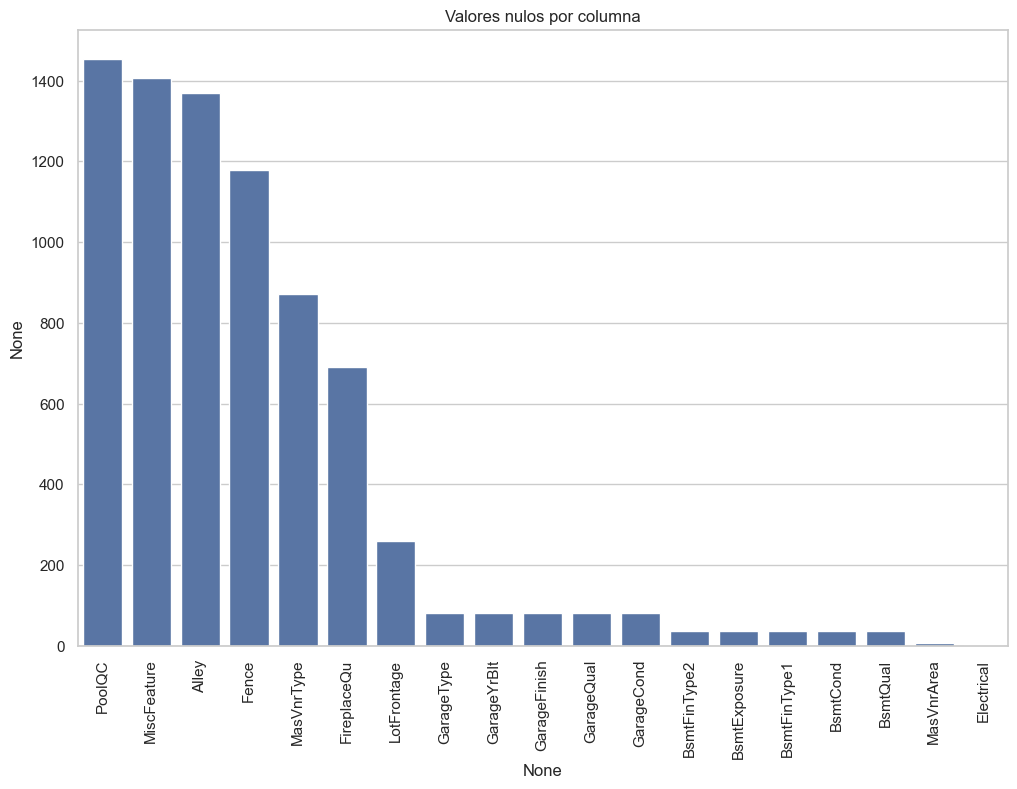

In [105]:
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_data.index, y=missing_data)
plt.xticks(rotation=90)
plt.title('Valores nulos por columna')
plt.show()


## Transformaciones de Datos

Las transformaciones de datos son esenciales para limpiar y preparar los datos para el análisis. 
Esto puede incluir el manejo de valores nulos, la creación de nuevas columnas y la eliminación de columnas innecesarias.


### Manejo de valores nulos

Pandas proporciona varias formas de manejar valores nulos, incluyendo la eliminación de filas o columnas, 
y la imputación de valores (por ejemplo, reemplazando valores nulos con la media o mediana de la columna).


In [106]:
# Reemplazo de valores nulos con la mediana (por simplicidad)
for column in data.columns:
    if data[column].dtype != 'object':
        data[column].fillna(data[column].median())


In [107]:
print("\nValores nulos por columna:")
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print(missing_data)


Valores nulos por columna:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


### Creación de nuevas columnas

Pandas facilita la creación de nuevas columnas basadas en operaciones o condiciones aplicadas a columnas existentes.


In [108]:
# Ejemplo: Crear una columna de antigüedad de la casa
data['HouseAge'] = 2024 - data['YearBuilt']


### Eliminación de columnas innecesarias

Eliminar columnas innecesarias puede ayudar a simplificar nuestro DataFrame y hacer que el análisis sea más eficiente.


In [109]:
data.drop(columns=['Id'], inplace=True)

## Acceso a Filas y Columnas

### Selección de columnas

Podemos seleccionar columnas individuales o múltiples columnas para crear un nuevo DataFrame.


In [110]:
# Seleccionar una columna
sale_price = data['SalePrice']
print(sale_price.head())



# Seleccionar múltiples columnas
subset = data[['SalePrice', 'GrLivArea', 'HouseAge']]
print(subset.head())


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64
   SalePrice  GrLivArea  HouseAge
0     208500       1710        21
1     181500       1262        48
2     223500       1786        23
3     140000       1717       109
4     250000       2198        24


### Selección de filas por índice

Podemos seleccionar filas específicas utilizando sus índices.


In [111]:
# Seleccionar la primera fila
first_row = data.iloc[0]
print(first_row)

# Seleccionar múltiples filas
multiple_rows = data.iloc[0:5]
print(multiple_rows)


MSSubClass           60
MSZoning             RL
LotFrontage        65.0
LotArea            8450
Street             Pave
                  ...  
YrSold             2008
SaleType             WD
SaleCondition    Normal
SalePrice        208500
HouseAge             21
Name: 0, Length: 81, dtype: object
   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    Inside  ...    NaN   NaN         NaN       0   
1         Lvl    AllPub       FR2  ...    NaN   NaN         NaN       0   
2         Lvl    AllPub    Inside  ...    NaN   NaN    

### Selección de filas por condición

Podemos seleccionar filas que cumplan con ciertas condiciones.


In [112]:
# Seleccionar casas con precios superiores a $200,000
expensive_houses = data[data['SalePrice'] > 200000]
print(expensive_houses.head())


    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           60       RL         65.0     8450   Pave   NaN      Reg   
2           60       RL         68.0    11250   Pave   NaN      IR1   
4           60       RL         84.0    14260   Pave   NaN      IR1   
6           20       RL         75.0    10084   Pave   NaN      Reg   
11          60       RL         85.0    11924   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolQC Fence MiscFeature MiscVal  \
0          Lvl    AllPub    Inside  ...    NaN   NaN         NaN       0   
2          Lvl    AllPub    Inside  ...    NaN   NaN         NaN       0   
4          Lvl    AllPub       FR2  ...    NaN   NaN         NaN       0   
6          Lvl    AllPub    Inside  ...    NaN   NaN         NaN       0   
11         Lvl    AllPub    Inside  ...    NaN   NaN         NaN       0   

   MoSold YrSold  SaleType  SaleCondition  SalePrice  HouseAge  
0       2   2008        WD         Normal     20850

### Ordenación

Podemos ordenar los datos basados en los valores de una o más columnas.


In [113]:
# Ordenar por precio de venta en orden descendente
sorted_data = data.sort_values(by='SalePrice', ascending=False)
print(sorted_data.head())


      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
691           60       RL        104.0    21535   Pave   NaN      IR1   
1182          60       RL        160.0    15623   Pave   NaN      IR1   
1169          60       RL        118.0    35760   Pave   NaN      IR1   
898           20       RL        100.0    12919   Pave   NaN      IR1   
803           60       RL        107.0    13891   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolQC  Fence MiscFeature MiscVal  \
691          Lvl    AllPub    Corner  ...    NaN    NaN         NaN       0   
1182         Lvl    AllPub    Corner  ...     Ex  MnPrv         NaN       0   
1169         Lvl    AllPub   CulDSac  ...    NaN    NaN         NaN       0   
898          Lvl    AllPub    Inside  ...    NaN    NaN         NaN       0   
803          Lvl    AllPub    Inside  ...    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  HouseAge  
691       1   2007 

 ## Agrupación y Agregación

Pandas proporciona potentes funciones para agrupar datos y calcular estadísticas agregadas.


### Agrupación de datos

Podemos agrupar datos por una columna y calcular estadísticas agregadas como la media, la suma, etc.


In [114]:
# Precio promedio por barrio
neighborhood_price = data.groupby('Neighborhood')['SalePrice']
print(neighborhood_price.head())


0      208500
1      181500
2      223500
3      140000
4      250000
        ...  
504    147000
550    140000
599    151000
675    148500
956    124000
Name: SalePrice, Length: 122, dtype: int64


### Agregación de datos

Podemos aplicar múltiples funciones de agregación a la vez.


In [115]:
# Agregación de estadísticas descriptivas por barrio
neighborhood_stats = data.groupby('Neighborhood').agg({'SalePrice': ['mean', 'median', 'std']})
print(neighborhood_stats.head())

                  SalePrice                        
                       mean    median           std
Neighborhood                                       
Blmngtn       194870.882353  191000.0  30393.229219
Blueste       137500.000000  137500.0  19091.883092
BrDale        104493.750000  106000.0  14330.176493
BrkSide       124834.051724  124300.0  40348.689270
ClearCr       212565.428571  200250.0  50231.538993


## Joins y Merges

Pandas permite combinar múltiples DataFrames de diferentes maneras, incluyendo joins y merges.


### Merge

Podemos combinar dos DataFrames basados en valores comunes de una columna.


In [116]:
# Ejemplo de merge
additional_data = pd.DataFrame({
    'Neighborhood': ['CollgCr', 'Veenker', 'Crawfor'],
    'SchoolQuality': ['A', 'B', 'A']
})
merged_data = pd.merge(data, additional_data, on='Neighborhood', how='left')
print(merged_data.head())


   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub    Inside  ...   NaN         NaN       0      2   
1         Lvl    AllPub       FR2  ...   NaN         NaN       0      5   
2         Lvl    AllPub    Inside  ...   NaN         NaN       0      9   
3         Lvl    AllPub    Corner  ...   NaN         NaN       0      2   
4         Lvl    AllPub       FR2  ...   NaN         NaN       0     12   

  YrSold SaleType  SaleCondition  SalePrice  HouseAge  SchoolQuality  
0   2008       WD         Normal     208500        21    

### Diferencia entre merge y join en pandas

`pd.merge()`

Es una función poderosa de pandas que permite combinar dos DataFrames basándose en una o más columnas clave.
Es similar a una operación de JOIN en SQL.
merge ofrece gran flexibilidad en la forma de combinación (inner, outer, left, right).

`merged_data = pd.merge(df1, df2, on='key_column', how='left')`

`DataFrame.join()` 

Es un método de pandas que combina dos DataFrames basándose en el índice de uno de ellos.
join también permite especificar el tipo de combinación (left, right, inner, outer).

`joined_data = df1.join(df2, on='key_column', how='left')`

Aquí, df1 y df2 se combinan basándose en el índice de df1 y la columna key_column de df2.

### Concatenación

Podemos concatenar DataFrames para combinarlos verticalmente u horizontalmente.


In [117]:
# Ejemplo de concatenación vertical
additional_rows = data.head(3)
concatenated_data = pd.concat([data, additional_rows])
print(concatenated_data.tail(5))


      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   

     LandContour Utilities LotConfig  ... PoolQC Fence MiscFeature MiscVal  \
1458         Lvl    AllPub    Inside  ...    NaN   NaN         NaN       0   
1459         Lvl    AllPub    Inside  ...    NaN   NaN         NaN       0   
0            Lvl    AllPub    Inside  ...    NaN   NaN         NaN       0   
1            Lvl    AllPub       FR2  ...    NaN   NaN         NaN       0   
2            Lvl    AllPub    Inside  ...    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  HouseAge  
1458      4   2010       

## Visualización de Datos

La visualización de datos es crucial para entender las relaciones y patrones en los datos. 
Pandas se integra bien con librerías de visualización como Matplotlib y Seaborn para crear gráficos informativos.


### Gráficos básicos

#### Histograma de precios de casas

El histograma nos muestra la distribución de los precios de las casas, ayudándonos a identificar tendencias y valores atípicos.


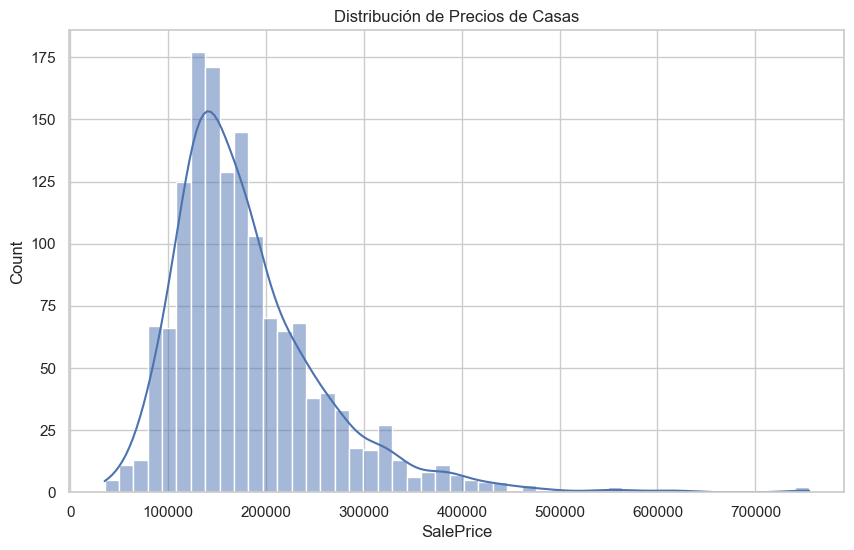

In [118]:
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribución de Precios de Casas')
plt.show()


#### Gráfico de barras: precio promedio por barrio

El gráfico de barras nos permite comparar el precio promedio de las casas en diferentes barrios, 
lo que puede ser útil para entender cómo la ubicación afecta el precio.


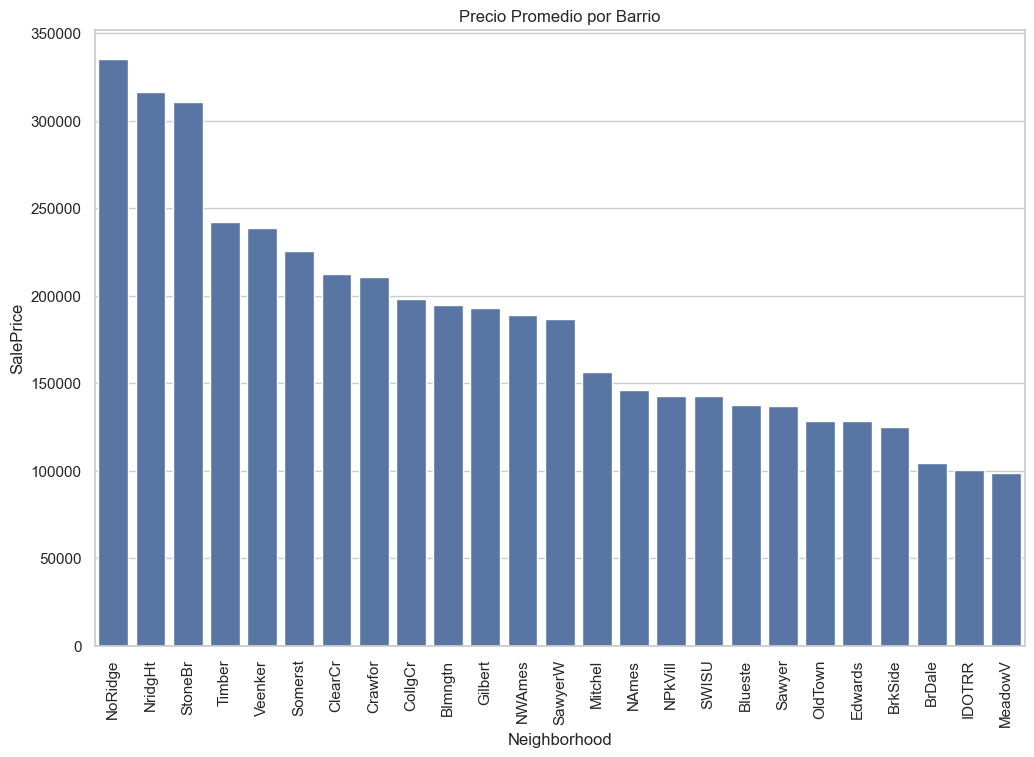

In [119]:
neighborhood_price = data.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=neighborhood_price.index, y=neighborhood_price)
plt.xticks(rotation=90)
plt.title('Precio Promedio por Barrio')
plt.show()


## Análisis de Datos

Pandas proporciona poderosas herramientas para analizar datos, incluyendo la agrupación, filtrado y aplicación de funciones personalizadas.


### Agrupación de datos

Agrupar datos por una columna y calcular métricas agregadas (como la media) es una forma efectiva de resumir y analizar grandes conjuntos de datos.
Aquí estamos viendo cómo ha cambiado el precio promedio de las casas a lo largo del tiempo.


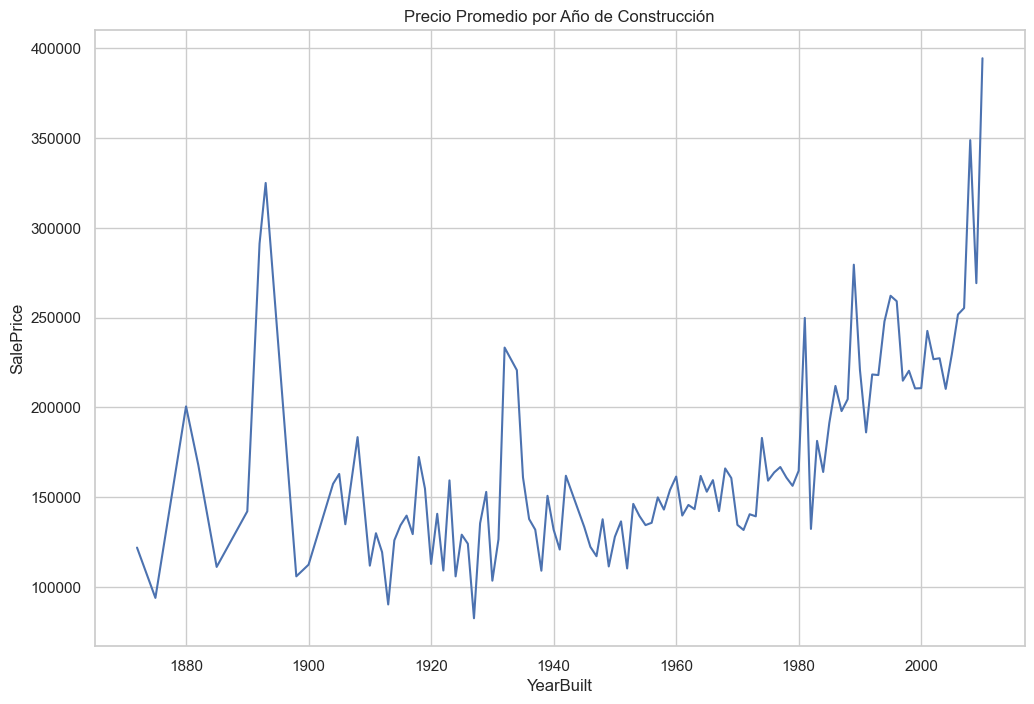

In [120]:
# Ejemplo: Precio promedio por año de construcción
year_price = data.groupby('YearBuilt')['SalePrice'].mean()

# Visualización del precio promedio por año de construcción
plt.figure(figsize=(12, 8))
sns.lineplot(x=year_price.index, y=year_price)
plt.title('Precio Promedio por Año de Construcción')
plt.show()


### Filtrado de datos

El filtrado de datos nos permite enfocarnos en subconjuntos específicos de nuestro DataFrame que cumplen con ciertas condiciones.
En este ejemplo, estamos seleccionando casas grandes para un análisis más detallado.


In [121]:
# Ejemplo: Casas con más de 2000 pies cuadrados de área habitable
large_houses = data[data['GrLivArea'] > 2000]
print("\nNúmero de casas con más de 2000 pies cuadrados de área habitable:", large_houses.shape[0])



Número de casas con más de 2000 pies cuadrados de área habitable: 214
